# Exercise 6.4 - Supervised Machine Learning: Regression

## 1. Import libraries, set system path, and import the data

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Set system path
path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Immersion Course\Achievement 6\Covid Analysis'

In [4]:
# Import dataset into df_covid_19 dataframe
df_covid_19 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths.csv'))

In [5]:
# Validate the dataset
print(df_covid_19.head())
print(df_covid_19.info())
df_covid_19.shape

   Data As Of  Start Date    End Date    Year  Month    State  \
0  2023-09-24  2020-01-01  2020-01-31  2020.0    1.0  Alabama   
1  2023-09-24  2020-02-01  2020-02-29  2020.0    2.0  Alabama   
2  2023-09-24  2020-03-01  2020-03-31  2020.0    3.0  Alabama   
3  2023-09-24  2020-04-01  2020-04-30  2020.0    4.0  Alabama   
4  2023-09-24  2020-05-01  2020-05-31  2020.0    5.0  Alabama   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
2  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
3  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
4  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   

   COVID-19 Deaths  Number of Mentions Flag  
0              0.0                 0.0  NaN  
1              0.0                 0.0  NaN  
2              0.0        

(430560, 13)

## 2. Cleaning the data

In [6]:
# Create a dataframe containing only the numeric columns necessary for analysis
df_covid_19_numeric = df_covid_19[['Number of Mentions', 'COVID-19 Deaths']]

In [7]:
# Valifdate the new dataframe
print(df_covid_19_numeric.head())
print(df_covid_19_numeric.info())
df_covid_19_numeric.shape

   Number of Mentions  COVID-19 Deaths
0                 0.0              0.0
1                 0.0              0.0
2                 0.0              0.0
3                 0.0              0.0
4                 0.0              0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Number of Mentions  430560 non-null  float64
 1   COVID-19 Deaths     430560 non-null  float64
dtypes: float64(2)
memory usage: 6.6 MB
None


(430560, 2)

## 3. Exploratory data analysis

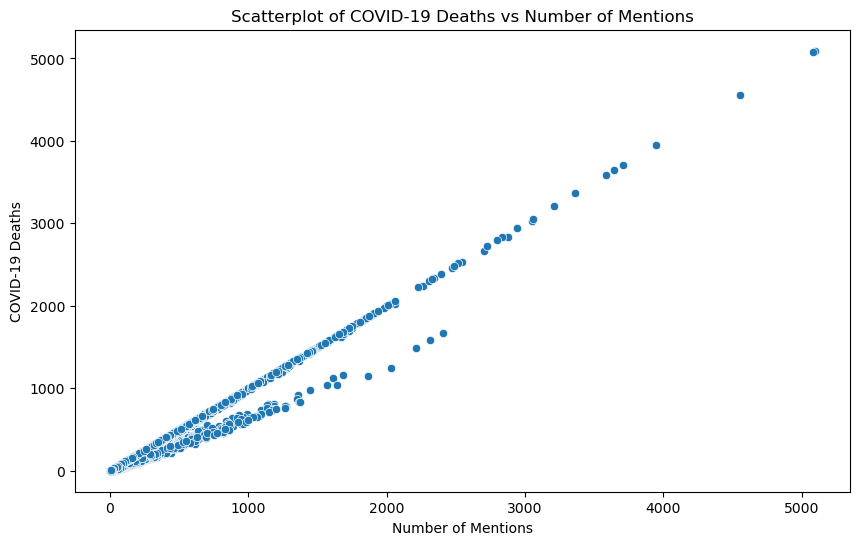

In [8]:
# Create a Scatterplot to visualize the relationship between Number of Mentions and COVID-19 Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_covid_19_numeric, x='Number of Mentions', y='COVID-19 Deaths')
plt.title('Scatterplot of COVID-19 Deaths vs Number of Mentions')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.show()

## 4. Hypothesis

The higher the number of mentions a condition appears on death certificates, then the higher the Covid-19 mortality rate will be.

## 5. Reshape variables into NumPy arrays

X = the independent variable or predictor in our analysis is the Number of Mentions <br>
y = the dependent variable or response is the Covid-19 deaths

In [9]:
# Define the independent variable (x) and the dependent variable (y)
X = df_covid_19_numeric['Number of Mentions'].values.reshape(-1, 1)
y = df_covid_19_numeric['COVID-19 Deaths'].values

## 6. Split the dataframe into Training and Test datasets

In [10]:
# 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [11]:
# Verify the shape of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (301392, 1)
X_test shape: (129168, 1)
y_train shape: (301392,)
y_test shape: (129168,)


## 7. Run linear regression on the datasets

In [12]:
# Initialize the linear regression model
regression = LinearRegression()

In [13]:
# Fit the model to the training data
regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict on the test data
y_pred = regression.predict(X_test)

## 8. Visualize the results

Create a scatterplot that shows the regression line on our test dataset

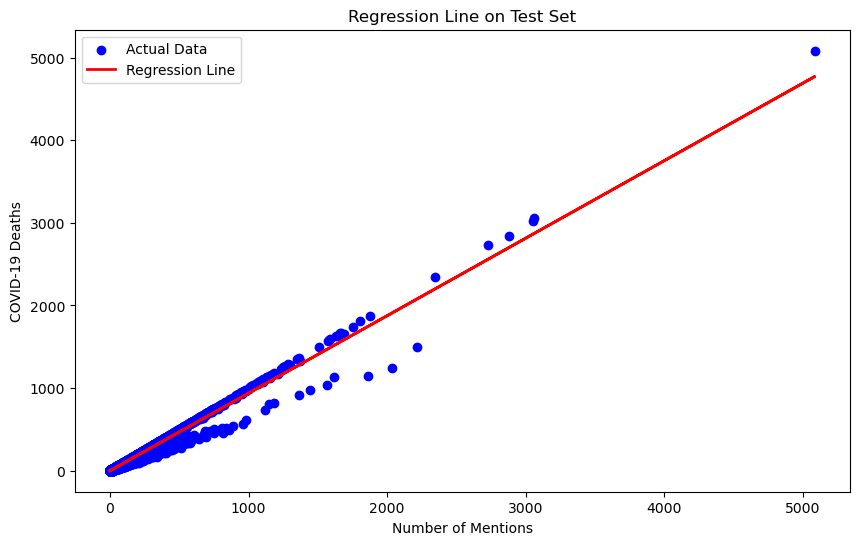

In [28]:
# Plot actual vs predicted values to visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Regression Line on Test Set')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
plt.legend()


# Export to the "Visualizations" folder
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'regression_line_test_set.png')
plt.savefig(file_name)

plt.show()

## 9. Interpretation of resulsts

The scatterplot and regression line visualization show a clear positive relationship between the "Number of Mentions" of a condition on death certificates and "COVID-19 Deaths".
The regression line closely follows the data points, indicating a strong fit.

## 10. Validate Model performance

In [16]:
# Calculate the mean squared error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 66.74206059555138
R2 Score: 0.9752017595084925


## 11. Compare the predicted y values with the actual y values in our dataframe

In [17]:
# Create a dataframe to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [18]:
# Verify the results
print(comparison_df.head(30))
print(comparison_df.info())
comparison_df.shape

    Actual   Predicted
0      0.0   -0.127167
1     55.0   53.358521
2      0.0   -0.127167
3      0.0   -0.127167
4      0.0   -0.127167
5      0.0   -0.127167
6      0.0   -0.127167
7      0.0   -0.127167
8      0.0   -0.127167
9      0.0   -0.127167
10    20.0   34.591613
11    39.0   72.125428
12     6.0    0.811179
13     8.0    3.626215
14     0.0   -0.127167
15   330.0  309.526812
16     0.0   -0.127167
17     0.0   -0.127167
18     6.0    2.687870
19     3.0    7.379597
20     9.0    8.317942
21     9.0    5.502906
22     0.0   -0.127167
23     8.0    8.317942
24     0.0   -0.127167
25     4.0    1.749524
26     0.0   -0.127167
27     3.0    5.502906
28     0.0   -0.127167
29     9.0    1.749524
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129168 entries, 0 to 129167
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Actual     129168 non-null  float64
 1   Predicted  129168 non-null  float64
dtypes: float

(129168, 2)

## 12. Thoughts on Model performance

The MSE value of 66.75 is relatively small given the variation of the data points in our dataset which suggests that the model's predictions are close to the actual values. The high R-squared score of 0.975 indicated that 97.5% of variance in the COVID-19 Deaths can be explained by the Number of mentions conditions. Overall, the statistics indicate that our model is effective in predicting Covid-19 mortality based on the number of mentions. 

## 13. Additional Analyses

I will perform further linear regression testing on the top medical conditions that we identified in previous exercises. The medical conditions are: Influenza and pneumonia, ischemic heart disease, renal failure, diabetes, and vascular and unspecified dementia.

In [19]:
# Create a subset of our data including only the selected conditions
top_conditions = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Ischemic heart disease', 'Diabetes', 'Renal failure']
df_top_conditions = df_covid_19[df_covid_19['Condition'].isin(top_conditions)]

In [20]:
# Validate the filtering
unique_conditions = df_top_conditions['Condition'].unique()
unique_conditions

array(['Influenza and pneumonia', 'Ischemic heart disease', 'Diabetes',
       'Vascular and unspecified dementia', 'Renal failure'], dtype=object)

Influenza and pneumonia - Mean Squared Error: 7.51044393794761
Influenza and pneumonia - R2 Score: 0.999442301718962


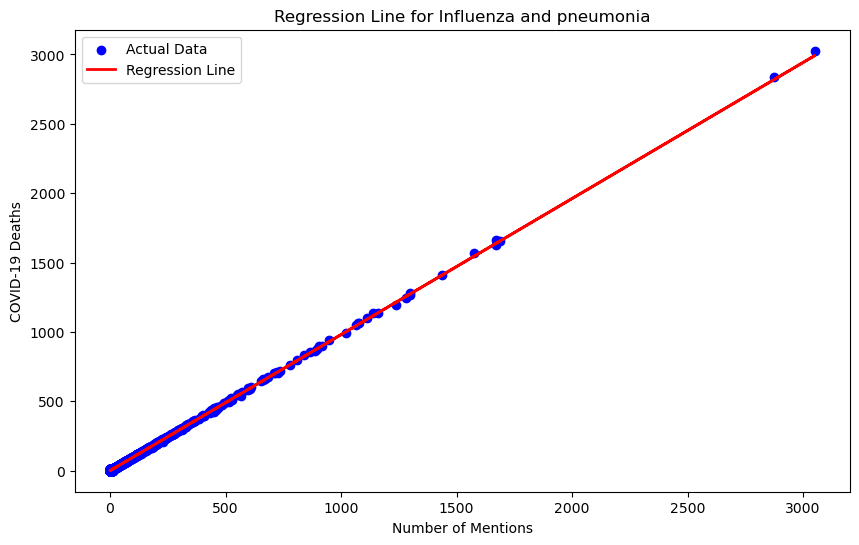

Vascular and unspecified dementia - Mean Squared Error: 2.696094330179883
Vascular and unspecified dementia - R2 Score: 0.9952282110299664


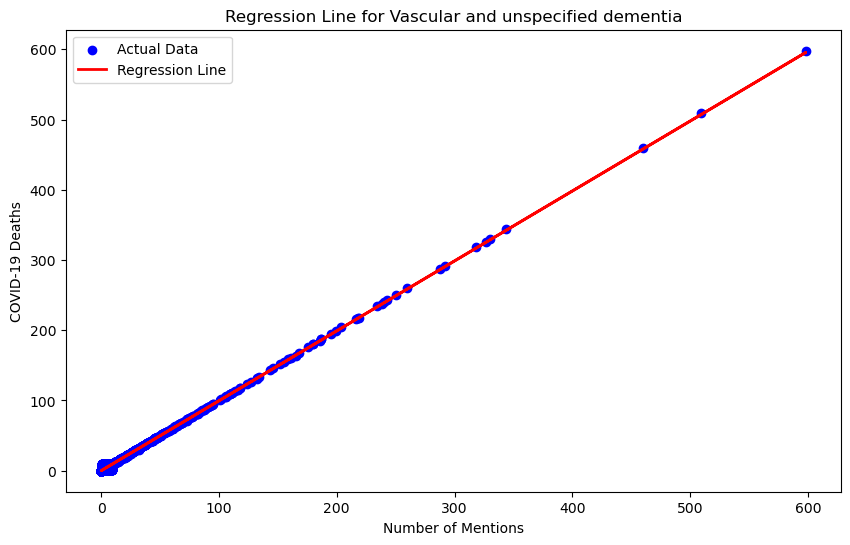

Ischemic heart disease - Mean Squared Error: 5.155288440821284
Ischemic heart disease - R2 Score: 0.9921679098157505


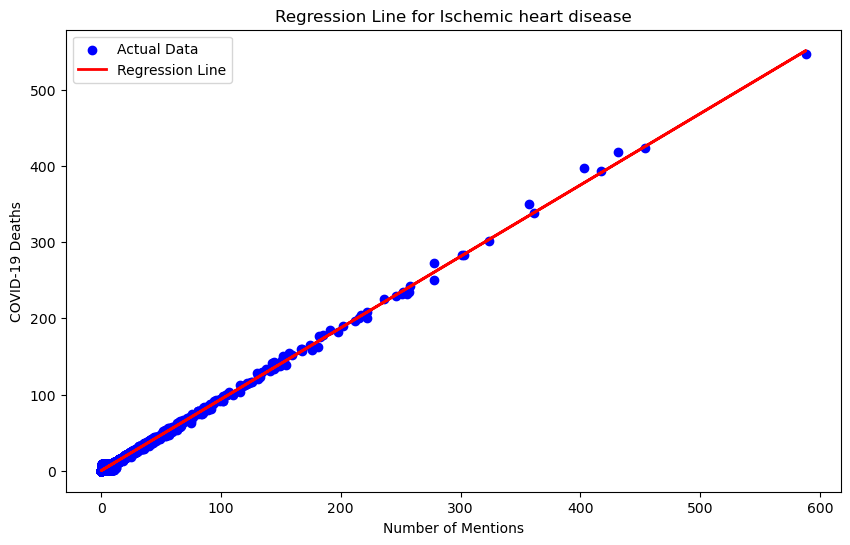

Diabetes - Mean Squared Error: 5.178336347340846
Diabetes - R2 Score: 0.9968581321601633


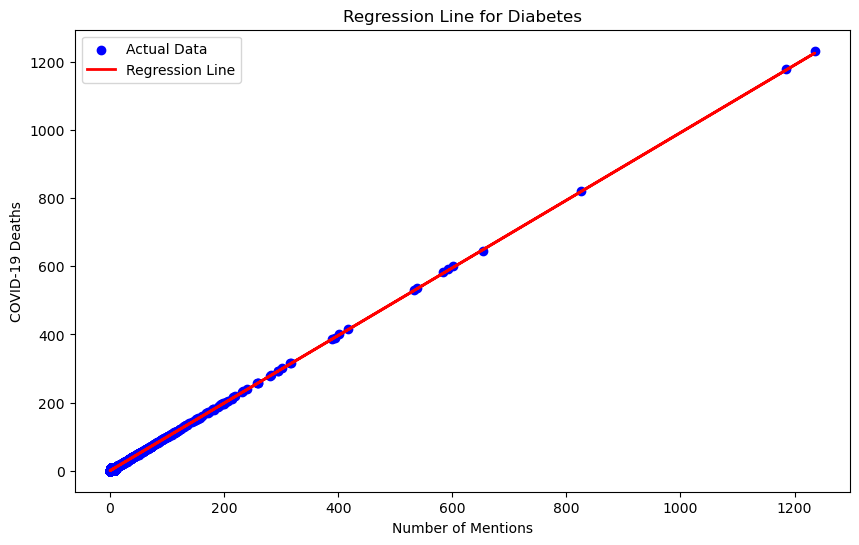

Renal failure - Mean Squared Error: 5.331503154051649
Renal failure - R2 Score: 0.9921941498383688


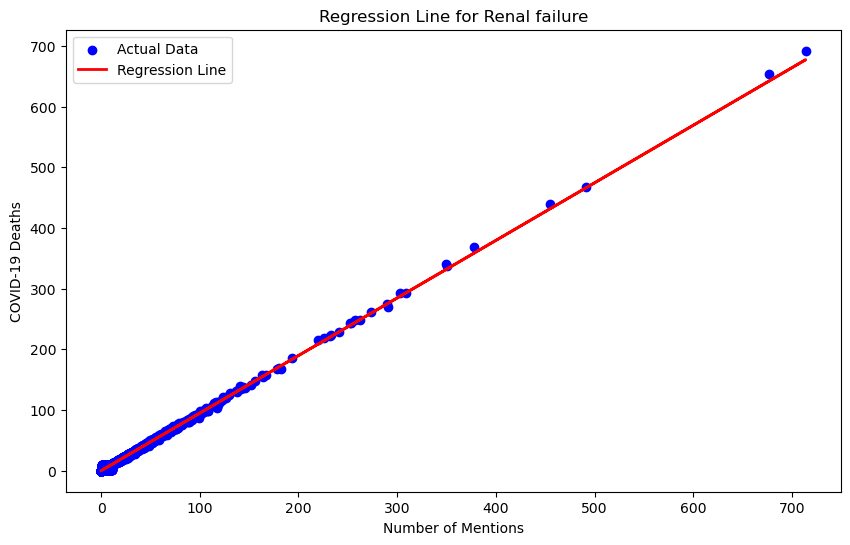

In [29]:
# Run the regression analysis for each of the specified conditons using a for loop
for condition in top_conditions:
    df_condition = df_top_conditions[df_top_conditions['Condition'] == condition]
    
    # Define the independent variable (x) and the dependent variable (y)
    X_condition = df_condition['Number of Mentions'].values.reshape(-1, 1)
    y_condition = df_condition['COVID-19 Deaths'].values
    
    # Split the data (70% training, 30% test)
    X_train_cond, X_test_cond, y_train_cond, y_test_cond = train_test_split(X_condition, y_condition, test_size=0.3, random_state=18)
    
    # Initialize the linear regression model
    regression_cond = LinearRegression()
    
    # Fit the model to the training data
    regression_cond.fit(X_train_cond, y_train_cond)
    
    # Predict on the test data
    y_pred_cond = regression_cond.predict(X_test_cond)
    
    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_cond, y_test_cond, color='blue', label='Actual Data')
    plt.plot(X_test_cond, y_pred_cond, color='red', linewidth=2, label='Regression Line')
    plt.title(f'Regression Line for {condition}')
    plt.xlabel('Number of Mentions')
    plt.ylabel('COVID-19 Deaths')
    plt.legend()
    
    
    # Check the performance statistics
    mse_cond = mean_squared_error(y_test_cond, y_pred_cond)
    r2_cond = r2_score(y_test_cond, y_pred_cond)
    print(f'{condition} - Mean Squared Error: {mse_cond}')
    print(f'{condition} - R2 Score: {r2_cond}')
    
    # Export the plots to the "Visualizations" folder
    file_name = os.path.join(path, '04 Analysis', 'Visualizations', f'regression_line_{condition.replace(" ", "_").lower()}.png')
    plt.savefig(file_name)

    plt.show()

## 14. Final Thoughts

The additional analyses we performed that focused on the top 5 medical conditions provided some interesting insights between the specific conditions and COvid-19 mortality.

Influenza and pneumonia: MSE = 7.27, R2 score = 0.999 <br>
Vascular and unspecified dementia: MSE = 3.13, R2 score = 0.994 <br>
Ischemic heart disease: MSE = 5.21, R2 score = 0.992 <br>
Diabetes: MSE = 5.22, R2 score = 0.997 <br>
Renal Failure: MSE = 5.42, R2 score = 0.992

These results show that our model performs well across these conditions with low MSE values and higher R2 scores than our original model which included all medical conditions. We can interpret these results to mean that the number of mentions of these medical conditions is a strong predictor of Covid-19 mortality.